In [47]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
data_path =  "./data/train.csv"

In [23]:
data = pd.read_csv(data_path)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950138 entries, 0 to 1950137
Data columns (total 48 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   flow_duration    float64
 2   Header_Length    float64
 3   Protocol type    float64
 4   Duration         float64
 5   Rate             float64
 6   Srate            float64
 7   Drate            float64
 8   fin_flag_number  float64
 9   syn_flag_number  float64
 10  rst_flag_number  float64
 11  psh_flag_number  float64
 12  ack_flag_number  float64
 13  ece_flag_number  float64
 14  cwr_flag_number  float64
 15  ack_count        float64
 16  syn_count        float64
 17  fin_count        float64
 18  urg_count        float64
 19  rst_count        float64
 20  HTTP             float64
 21  HTTPS            float64
 22  DNS              float64
 23  Telnet           float64
 24  SMTP             float64
 25  SSH              float64
 26  IRC              float64
 27  TCP         

In [25]:
print(data.describe())


                 ID  flow_duration  Header_Length  Protocol type  \
count  1.950138e+06   1.950138e+06   1.755125e+06   1.755125e+06   
mean   1.393035e+06   5.994925e+01   2.561773e+05   1.147029e+01   
std    8.040343e+05   9.899796e+02   8.636325e+05   1.157109e+01   
min    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
25%    6.966822e+05   0.000000e+00   5.400000e+01   6.000000e+00   
50%    1.393132e+06   7.493590e-02   1.790400e+02   6.000000e+00   
75%    2.089356e+06   4.271036e+00   3.354800e+04   1.645000e+01   
max    2.785911e+06   9.968566e+04   9.905298e+06   4.700000e+01   

           Duration          Rate         Srate         Drate  \
count  1.755125e+06  1.755125e+06  1.755125e+06  1.755125e+06   
mean   7.428192e+01  6.785824e+03  6.750602e+03  8.223632e-06   
std    2.871633e+01  8.137564e+04  8.048460e+04  8.870114e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.400000e+01  3.076981e+00  3.073111e+00  0.000000e+00 

In [26]:
print(data["Label"].unique())

['DoS-TCP_Flood' 'DoS-SYN_Flood' 'DDoS-ICMP_Flood' 'Recon-PortScan'
 'DDoS-RSTFINFlood' 'DDoS-SynonymousIP_Flood' 'DoS-UDP_Flood'
 'DoS-HTTP_Flood' 'DDoS-ICMP_Fragmentation' 'Recon-OSScan'
 'DDoS-ACK_Fragmentation' 'DNS_Spoofing' 'Mirai-greeth_flood'
 'BrowserHijacking' 'DDoS-TCP_Flood' 'DDoS-UDP_Fragmentation'
 'BenignTraffic' 'Recon-HostDiscovery' 'DDoS-HTTP_Flood'
 'Mirai-greip_flood' 'DDoS-UDP_Flood' 'Mirai-udpplain' 'MITM-ArpSpoofing'
 'DDoS-SYN_Flood' 'VulnerabilityScan' 'DDoS-SlowLoris' 'SqlInjection'
 'DDoS-PSHACK_Flood' 'CommandInjection' 'DictionaryBruteForce'
 'Recon-PingSweep' 'Backdoor_Malware' 'XSS' 'Uploading_Attack']


In [27]:
missing_values = data.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_values)

Percentage of missing values in each column:
ID                 0.000000
flow_duration      0.000000
Header_Length      9.999959
Protocol type      9.999959
Duration           9.999959
Rate               9.999959
Srate              9.999959
Drate              9.999959
fin_flag_number    0.000000
syn_flag_number    0.000000
rst_flag_number    9.999959
psh_flag_number    9.999959
ack_flag_number    0.000000
ece_flag_number    9.999959
cwr_flag_number    9.999959
ack_count          9.999959
syn_count          9.999959
fin_count          0.000000
urg_count          0.000000
rst_count          0.000000
HTTP               9.999959
HTTPS              9.999959
DNS                0.000000
Telnet             9.999959
SMTP               9.999959
SSH                9.999959
IRC                0.000000
TCP                9.999959
UDP                0.000000
DHCP               0.000000
ARP                9.999959
ICMP               9.999959
IPv                0.000000
LLC                0.000000
Tot

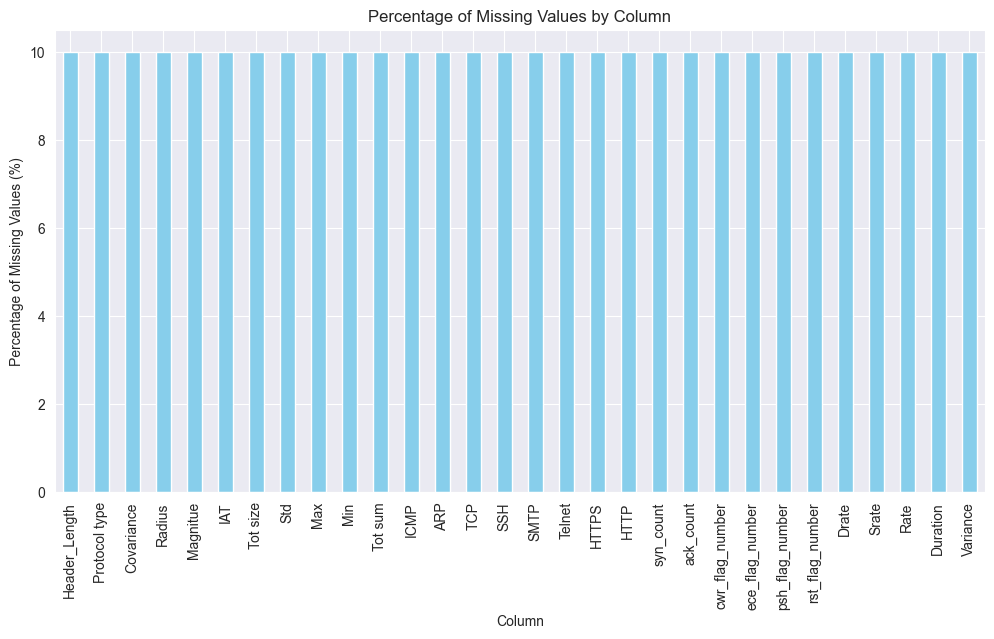

In [28]:
plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.show()

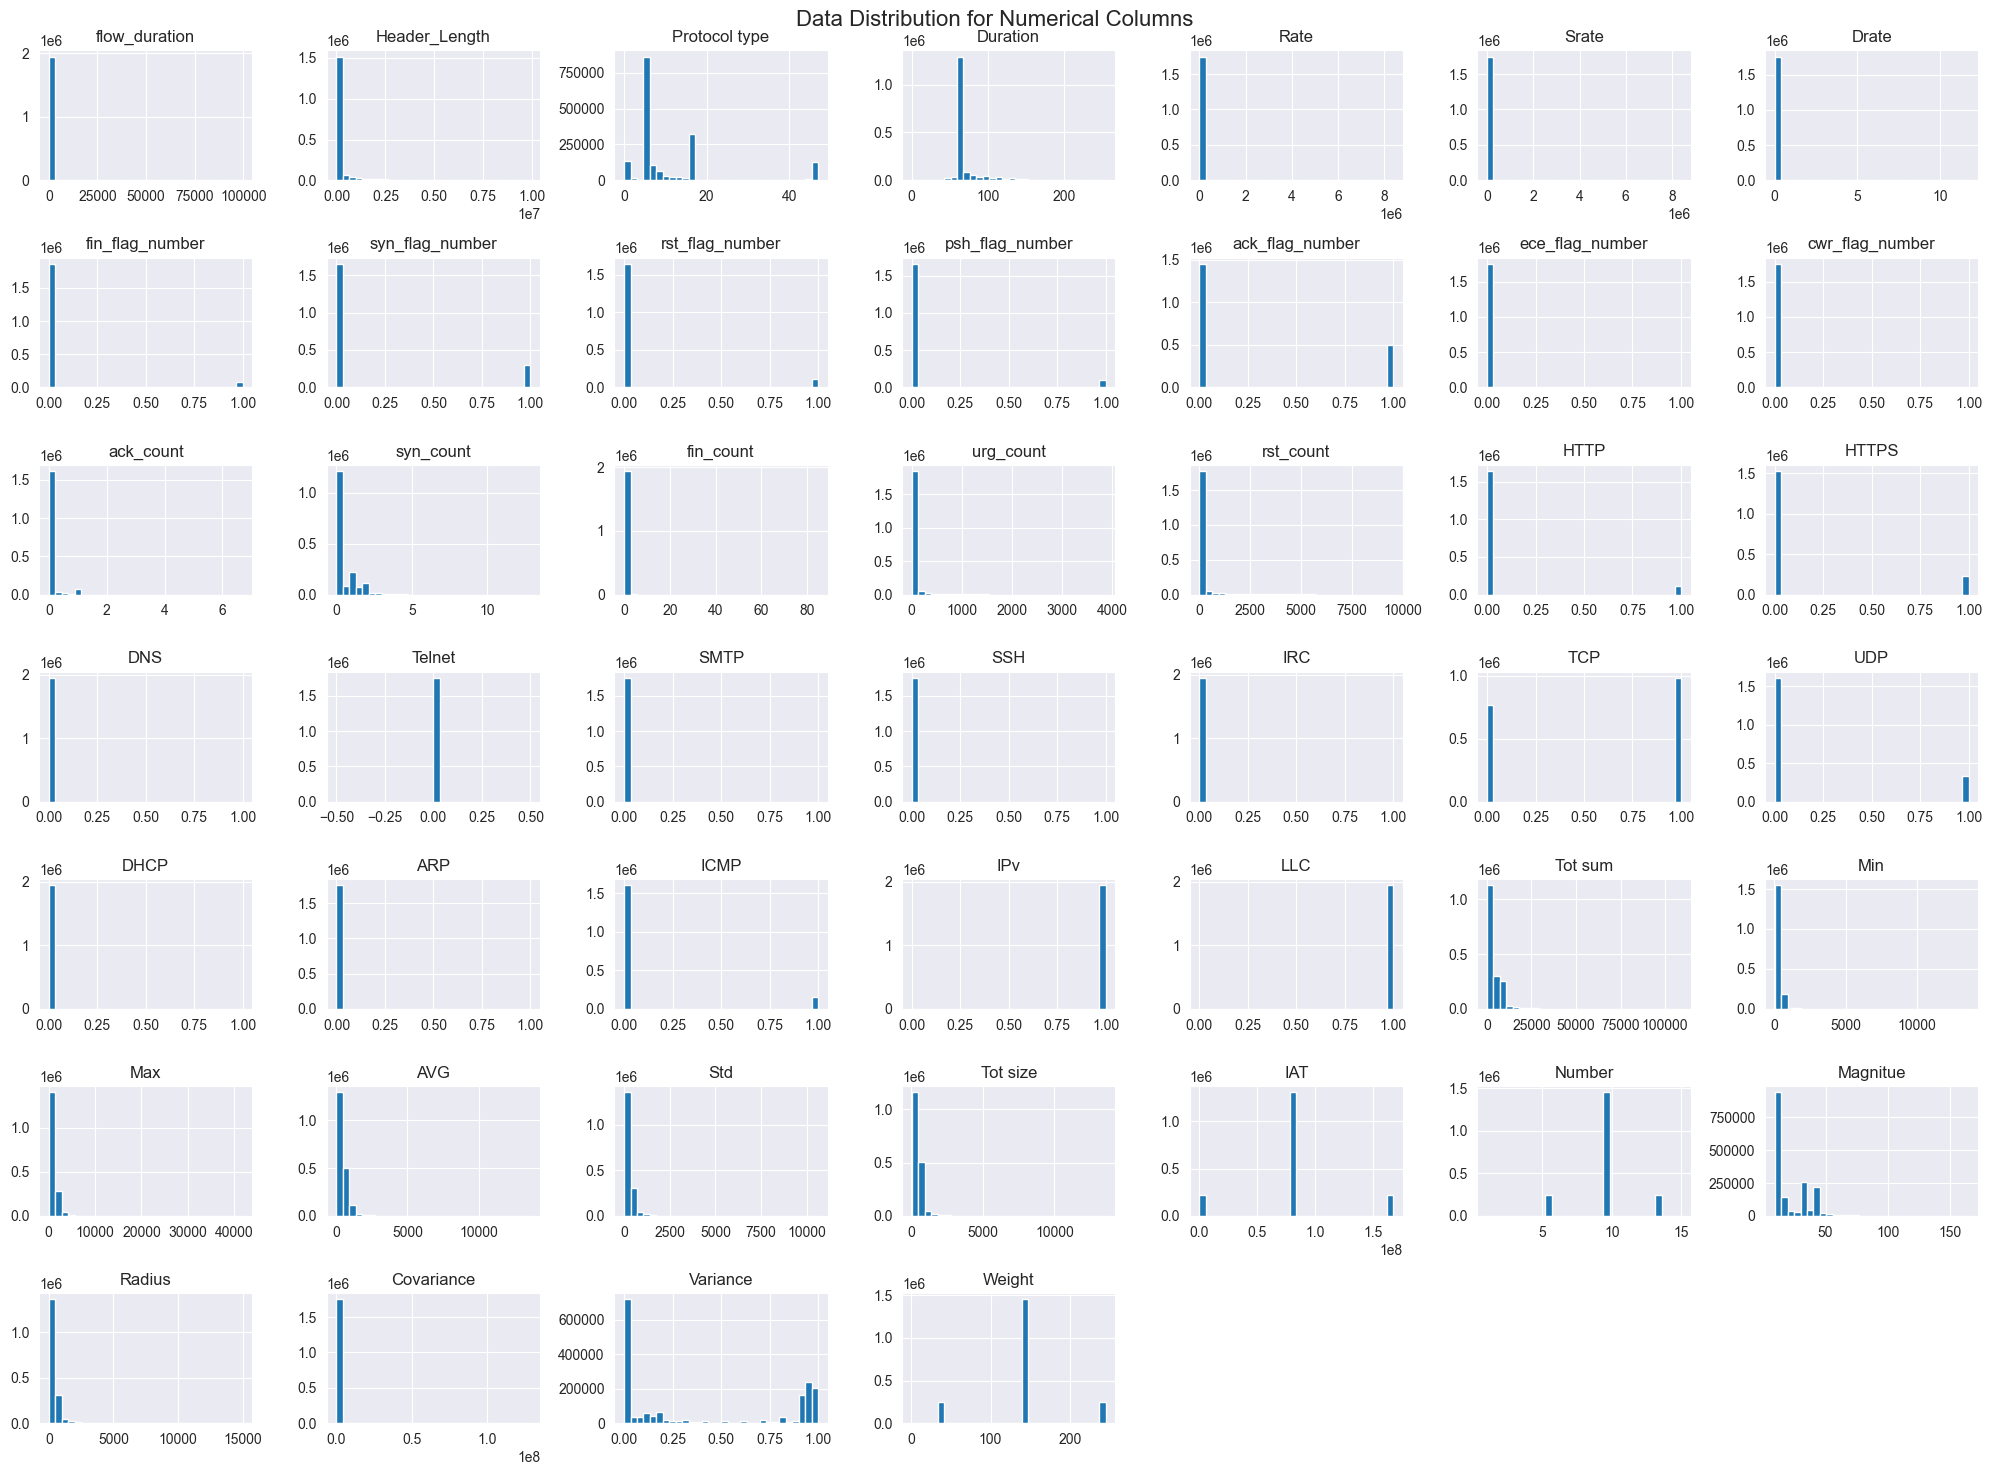

In [29]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('ID')
data[numerical_columns].hist(bins=30, figsize=(20, 15))
plt.suptitle("Data Distribution for Numerical Columns", size=16)
plt.tight_layout()
plt.show()

/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1962706659.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  imbalanced_values = pd.value_counts(list(data.Label))
/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1962706659.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  imbalanced_values = pd.value_counts(list(data.Label))


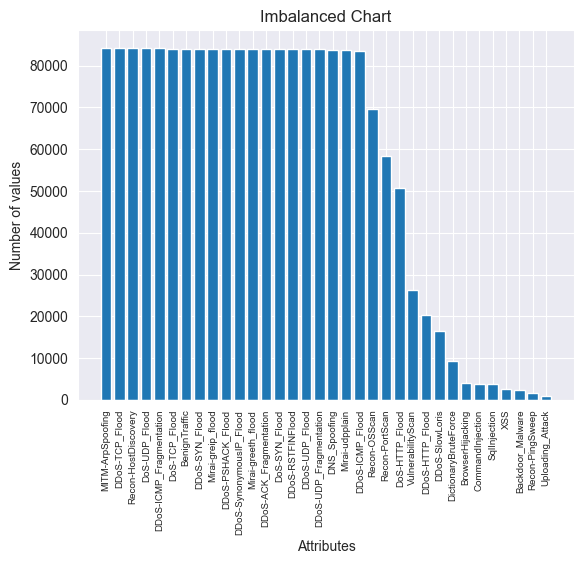

In [30]:
imbalanced_values = pd.value_counts(list(data.Label))
plt.bar(imbalanced_values.index.tolist(), imbalanced_values.values.tolist())
plt.title('Imbalanced Chart')
plt.xlabel('Attributes')
plt.xticks(fontsize = 7,rotation=90)
plt.ylabel('Number of values')
plt.show()

In [31]:
print(data.Label.value_counts())

Label
MITM-ArpSpoofing           84260
DDoS-TCP_Flood             84208
Recon-HostDiscovery        84139
DoS-UDP_Flood              84139
DDoS-ICMP_Fragmentation    84119
DoS-TCP_Flood              84086
BenignTraffic              84085
DDoS-SYN_Flood             84051
Mirai-greip_flood          84050
DDoS-PSHACK_Flood          84047
DDoS-SynonymousIP_Flood    84021
Mirai-greeth_flood         84018
DDoS-ACK_Fragmentation     84015
DoS-SYN_Flood              83971
DDoS-RSTFINFlood           83949
DDoS-UDP_Flood             83905
DDoS-UDP_Fragmentation     83895
DNS_Spoofing               83746
Mirai-udpplain             83653
DDoS-ICMP_Flood            83587
Recon-OSScan               69603
Recon-PortScan             58311
DoS-HTTP_Flood             50629
VulnerabilityScan          26378
DDoS-HTTP_Flood            20338
DDoS-SlowLoris             16573
DictionaryBruteForce        9213
BrowserHijacking            4134
CommandInjection            3821
SqlInjection                3748
XSS 

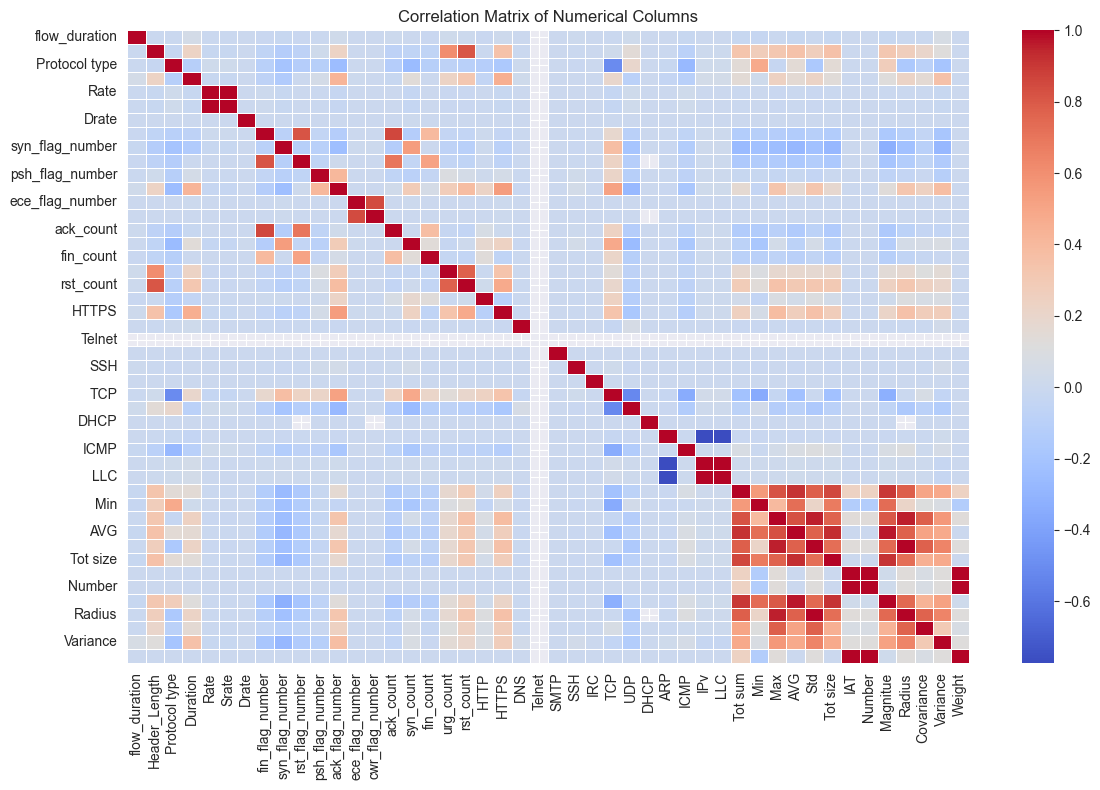

In [32]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.tight_layout()
plt.show()

In [33]:
# Display data shape after cleaning
print(f"\nData shape after cleaning: {data.shape}")


Data shape after cleaning: (1950138, 48)


In [34]:
# Fill missing values for numerical columns with median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if col in data.columns and data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in column '{col}' with median ({median_value})")

Filled missing values in column 'Header_Length' with median (179.04)
Filled missing values in column 'Protocol type' with median (6.0)
Filled missing values in column 'Duration' with median (64.0)


/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Filled missing values in column 'Rate' with median (21.503383902138484)
Filled missing values in column 'Srate' with median (21.48666273917164)
Filled missing values in column 'Drate' with median (0.0)
Filled missing values in column 'rst_flag_number' with median (0.0)
Filled missing values in column 'psh_flag_number' with median (0.0)
Filled missing values in column 'ece_flag_number' with median (0.0)
Filled missing values in column 'cwr_flag_number' with median (0.0)
Filled missing values in column 'ack_count' with median (0.0)
Filled missing values in column 'syn_count' with median (0.0)


/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Filled missing values in column 'HTTP' with median (0.0)
Filled missing values in column 'HTTPS' with median (0.0)
Filled missing values in column 'Telnet' with median (0.0)
Filled missing values in column 'SMTP' with median (0.0)
Filled missing values in column 'SSH' with median (0.0)
Filled missing values in column 'TCP' with median (1.0)
Filled missing values in column 'ARP' with median (0.0)
Filled missing values in column 'ICMP' with median (0.0)
Filled missing values in column 'Tot sum' with median (827.0)


/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Filled missing values in column 'Min' with median (54.8)
Filled missing values in column 'Max' with median (163.4)
Filled missing values in column 'Std' with median (2.347406511375219)
Filled missing values in column 'Tot size' with median (84.0)
Filled missing values in column 'IAT' with median (83254345.8524696)
Filled missing values in column 'Magnitue' with median (12.979856687218362)
Filled missing values in column 'Radius' with median (3.2732409323077976)
Filled missing values in column 'Covariance' with median (29.36322975482064)
Filled missing values in column 'Variance' with median (0.15)


/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
/var/folders/jl/9n1j4ck93snc6y4x8cwyd6xw0000gn/T/ipykernel_53037/1840346728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [35]:
print("\nRemaining missing values:")
print(data.isnull().sum())


Remaining missing values:
ID                 0
flow_duration      0
Header_Length      0
Protocol type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight 

In [36]:
scaler = MinMaxScaler()
numerical_columns = numerical_columns.drop('ID', errors='ignore')  # Remove 'ID' from numerical columns if exists
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("\nDataset after Min-Max Normalization:")
print(data.head())


Dataset after Min-Max Normalization:
        ID  flow_duration  Header_Length  Protocol type  Duration  \
0   769866   0.000000e+00       0.000005       0.127660  0.250980   
1  1859874   8.946432e-09       0.000006       0.127660  0.250980   
2   396092   0.000000e+00       0.000000       0.021277  0.250980   
3   179708   1.094909e-03       0.000201       0.174468  0.196471   
4  1527289   2.530050e-07       0.000006       0.126596  0.258471   

           Rate         Srate  Drate  fin_flag_number  syn_flag_number  ...  \
0  3.445959e-07  3.445959e-07    0.0              0.0              0.0  ...   
1  3.408723e-06  3.408723e-06    0.0              0.0              1.0  ...   
2  2.827175e-06  2.827175e-06    0.0              0.0              0.0  ...   
3  4.899753e-06  4.899753e-06    0.0              0.0              0.0  ...   
4  3.016070e-06  3.016070e-06    0.0              1.0              0.0  ...   

        Std  Tot size       IAT    Number      Magnitue    Radius  \
0  

In [48]:


target_column = 'Label'  # Replace with your target column name
X = data.drop(columns=[target_column])
y = data[target_column]

encoder = LabelEncoder()
y = encoder.fit_transform(y)
joblib.dump(encoder, 'encoder.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")



Training set size: 1560110 rows
Testing set size: 390028 rows


In [42]:
print(y)

[20 19  6 ... 26 29 22]


In [45]:
# Save processed training and testing datasets
print("\n### Saving Training and Testing Files ###")
X_train.to_csv("./data/X_train.csv", index=False)
X_test.to_csv("./data/X_test.csv", index=False)
y_train_df = pd.DataFrame(y_train, columns=[target_column])
y_train_df.to_csv("./data/y_train.csv", index=False)
y_test_df = pd.DataFrame(y_test, columns=[target_column])
y_test_df.to_csv("./data/y_test.csv", index=False)
print("Files saved successfully!")


### Saving Training and Testing Files ###
Files saved successfully!
